In [1]:
import shm
import numpy
import networkx
import matplotlib
import seaborn as sns
import pandas as pd
import pickle
import pymc3 as pm

In [2]:
import arviz as az
import shm.plot as sp
import matplotlib.pyplot as plt
import seaborn as sns
from shm.models.hlm import HLM

In [3]:
from pymc3 import model_to_graphviz

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 3)

Populating the interactive namespace from numpy and matplotlib


In [5]:
sns.set_style(
  "white",
  {
      "xtick.bottom": True,
      "ytick.left": True,
      "axes.spines.top": False,
      "axes.spines.right": False,
  },
)

In [6]:
def read_graph(infile):
    with open(infile, "rb") as fh:
        G = pickle.load(fh)
    return G

# Small model evaluation

In [7]:
readout_file = "../data_raw/small-simulated_data.tsv"
graph_file = "../data_raw/small-graph.pickle"
data_file = "../data_raw/small-data.pickle"

In [8]:
readout = pd.read_csv(readout_file, sep="\t")
G = read_graph(graph_file)

In [9]:
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


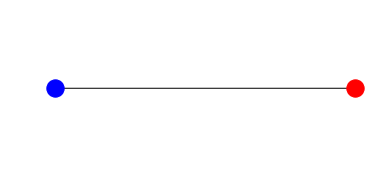

In [10]:
networkx.draw_networkx_nodes(
    networkx.subgraph(G, data['essential_genes']), 
    pos=networkx.shell_layout(G));
networkx.draw_networkx_nodes(
    networkx.subgraph(G, data['nonessential_genes']), 
    pos=networkx.shell_layout(G), node_color="blue");
networkx.draw_networkx_edges(G, pos=networkx.shell_layout(G));
plt.axis('off');

## Small simple model

In [63]:
trace_dir = "../../../results/small-simple_model_trace"
with HLM(readout, model="simple") as model:
    trace = pm.load_trace(trace_dir, model = model.model)
    ppc_trace = pm.sample_posterior_predictive(trace, 10000, model.model)

Building simple hierarchical model
100%|██████████| 10000/10000 [00:07<00:00, 1331.60it/s]


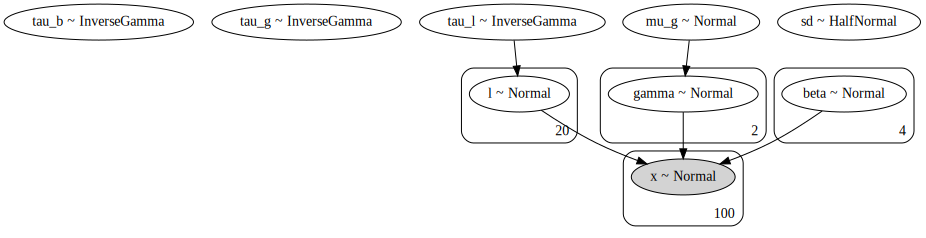

In [64]:
model_to_graphviz(model.model)

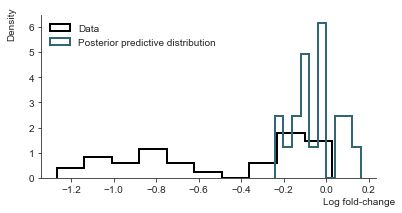

In [65]:
sp.plot_steps(readout, ppc_trace, bins=10);

In [59]:
data['gamma']

array([-0.83756546, -0.06117564])

In [25]:
np.mean(trace['gamma'], 0)[list(model._index_to_gene.keys())]

array([-0.75173589, -0.27249541])

In [57]:
data['beta']

array([-0.05281718, -0.10729686,  0.08654076, -0.23015387])

In [59]:
np.mean(trace['beta'], 0)[list(model._beta_idx_to_gene_cond.keys())]

array([-0.05952887, -0.35491281,  0.14529108,  0.08206712])

In [27]:
sp.plot_neff(trace, "gamma");

TypeError: plot_neff() missing 1 required positional argument: 'var_name'

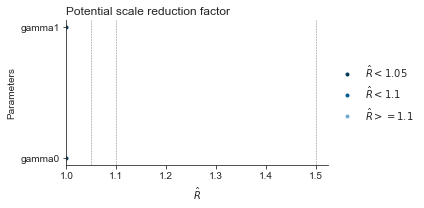

In [88]:
sp.plot_rhat(trace, "gamma");

In [43]:
y = pm.HalfCauchy.dist(beta=2)

In [46]:
y.random(size=100000).shape

(100000,)

## Small MRF model

In [66]:
trace_dir = "../../../results/small-mrf_model_trace"
with HLM(readout, model="mrf", graph=G) as model:
    trace = pm.load_trace(trace_dir, model = model.model)
    ppc_trace = pm.sample_posterior_predictive(trace, 10000, model.model)

Building mrf hierarchical model
100%|██████████| 10000/10000 [00:04<00:00, 2062.65it/s]


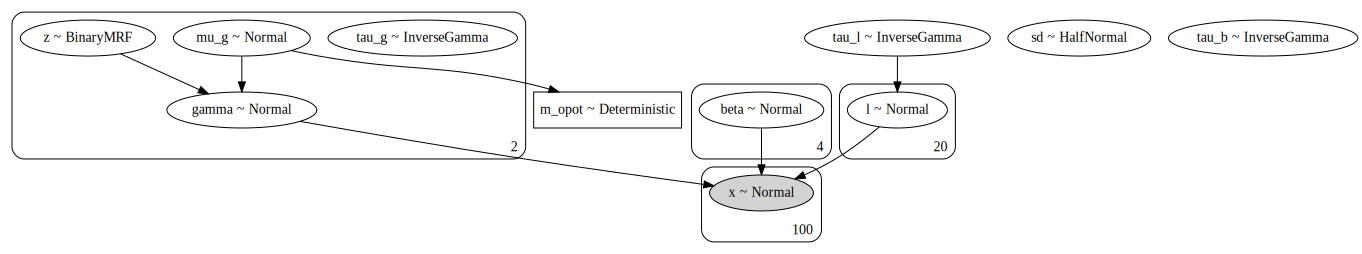

In [67]:
model_to_graphviz(model.model)

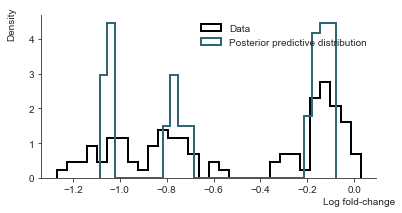

In [68]:
sp.plot_steps(readout, ppc_trace, bins=30);

In [67]:
data['gamma']

array([-0.83756546, -0.06117564])

In [68]:
np.mean(trace['gamma'], 0)[list(model._index_to_gene.keys())]

array([-0.81985371, -0.21693565])

In [69]:
data['beta']

array([-0.05281718, -0.10729686,  0.08654076, -0.23015387])

In [70]:
np.mean(trace['beta'], 0)[list(model._beta_idx_to_gene_cond.keys())]

array([ 0.06589449, -0.22893839,  0.11380071,  0.04971765])

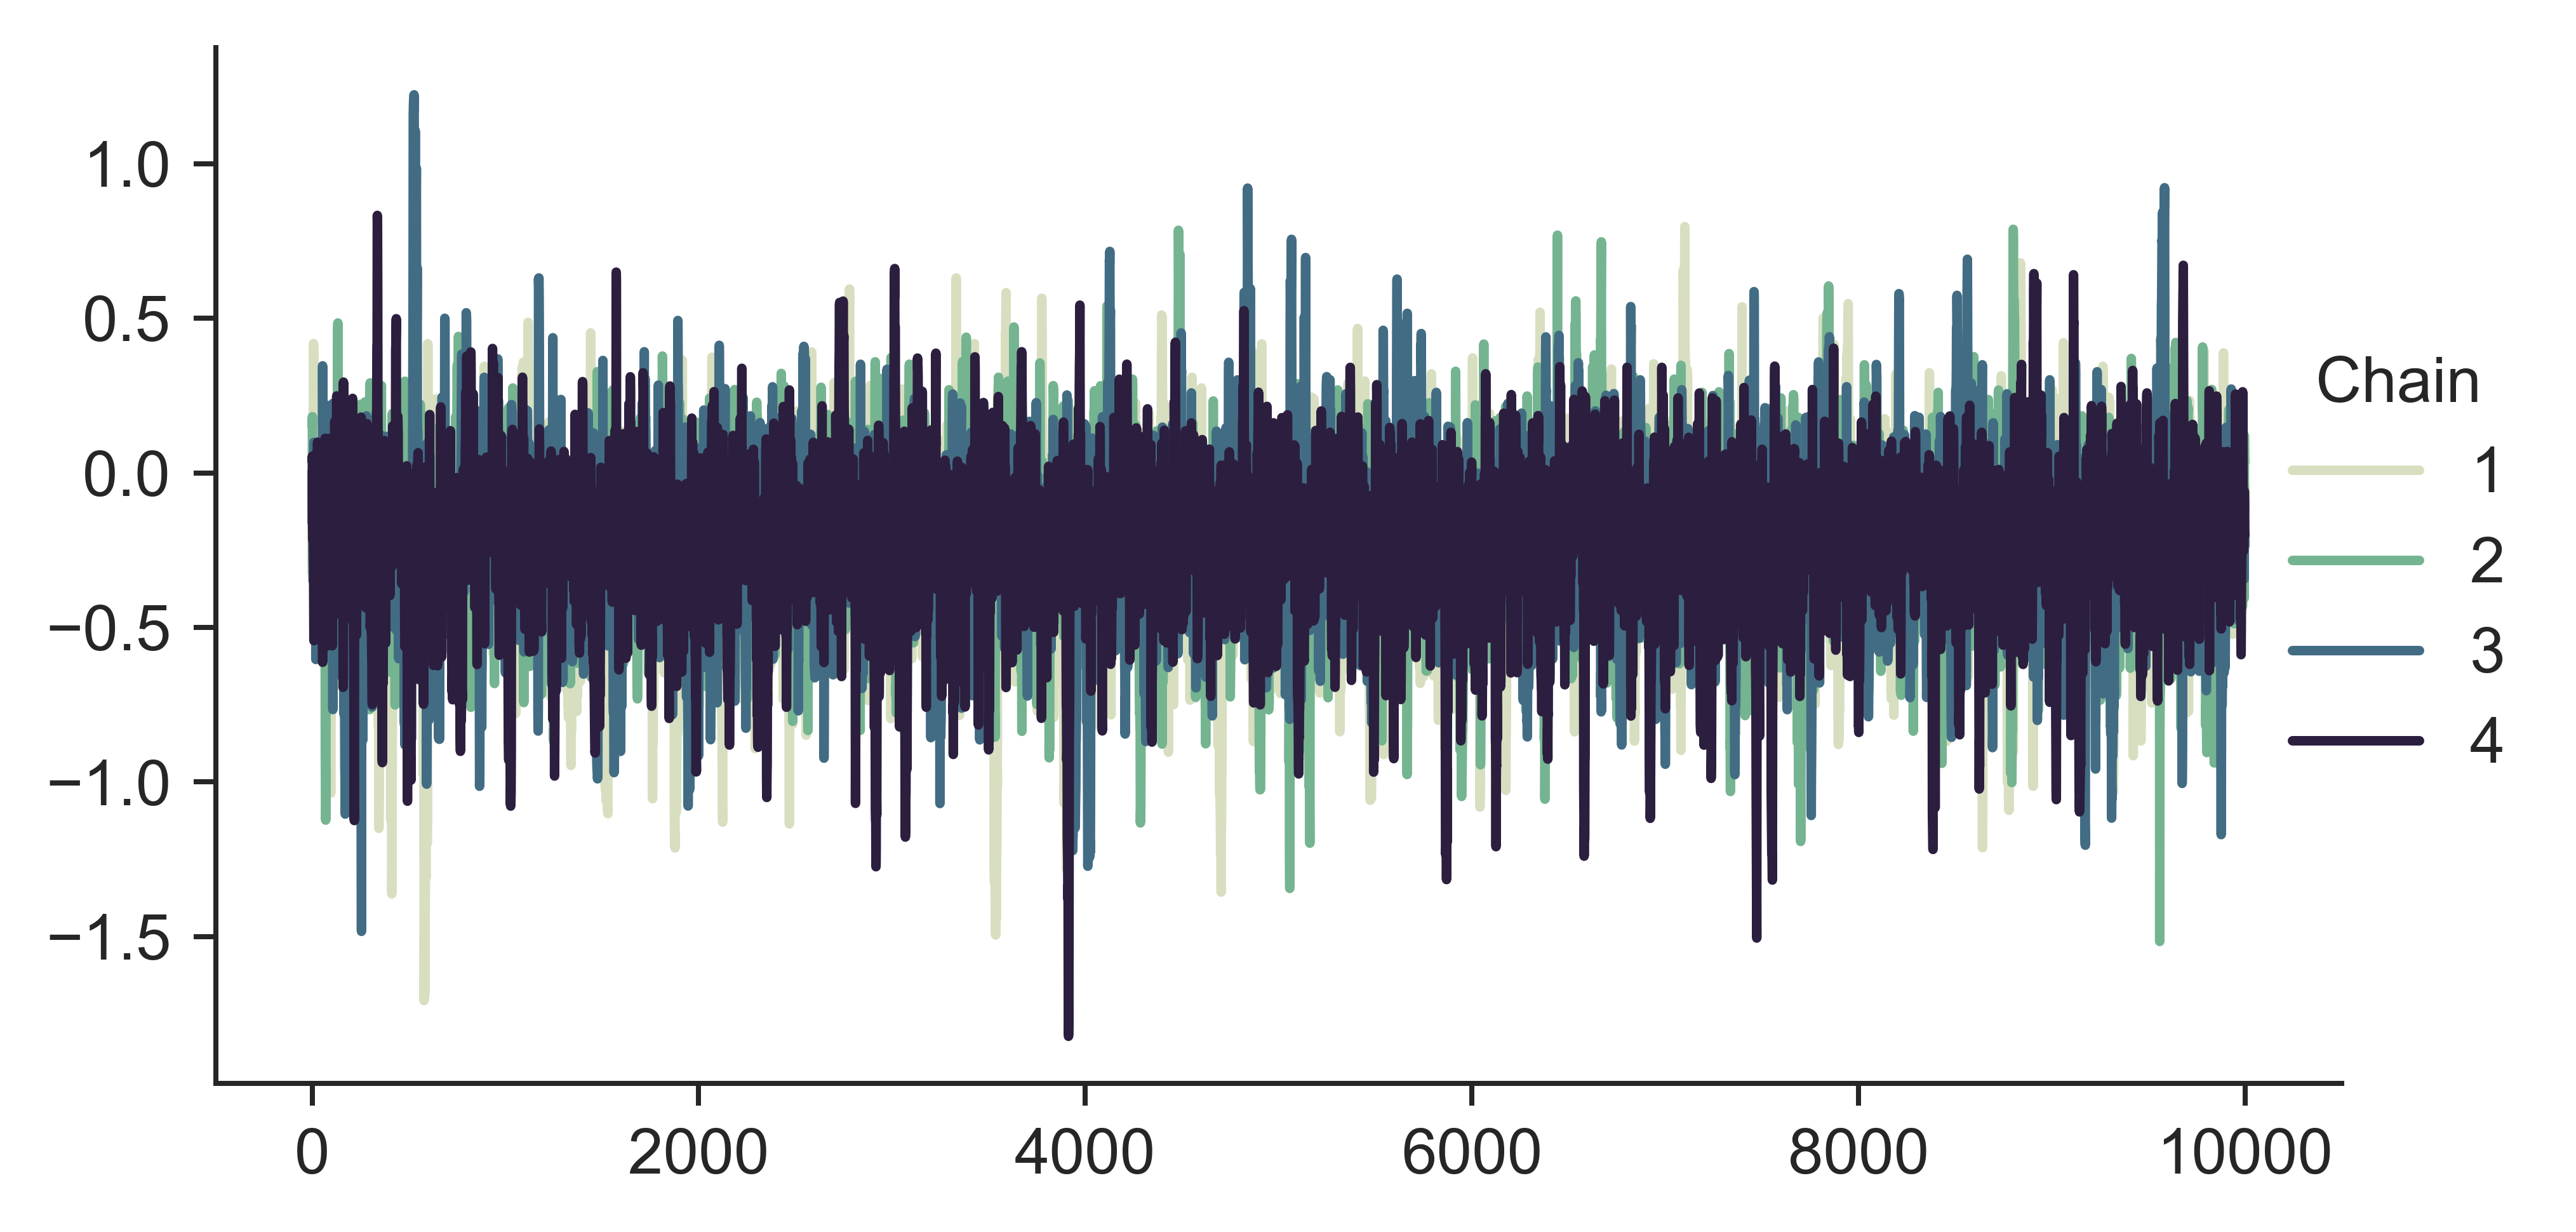

In [69]:
sp.plot_trace(trace, "gamma", 0, "");

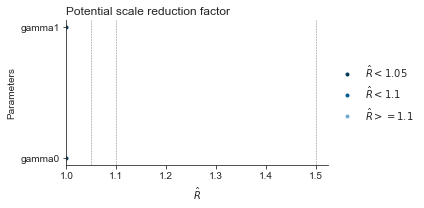

In [83]:
sp.plot_rhat(trace, "gamma");

In [70]:
sp.plot_neff(trace, "gamma");

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


TypeError: ('Wrong number of dimensions: expected 1, got 0 with shape ().', 'Container name "tau_l_log__"')

# Model evaluation

In [32]:
readout_file = "../data_raw/simulated_data.tsv"
graph_file = "../data_raw/graph.pickle"
data_file = "../data_raw/data.pickle"

In [33]:
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


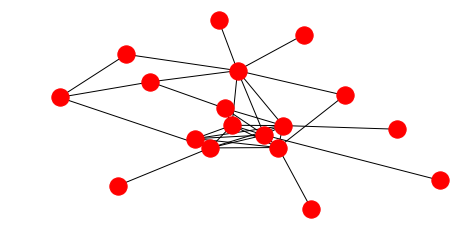

In [34]:
networkx.draw(data['graph'])

## Simple model

In [15]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

In [70]:
trace_dir = "../results/simple_model_trace"
with HLM(readout, model="simple", graph=graph) as model:
    trace = pm.load_trace(trace_dir, model = model.model)
    ppc_trace = pm.sample_posterior_predictive(trace, 10000, model.model)

Building simple hierarchical model
  0%|          | 0/10000 [00:00<?, ?it/s]


TypeError: zip argument #4 must support iteration

In [9]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

In [86]:
len(data['essential_genes'])

30

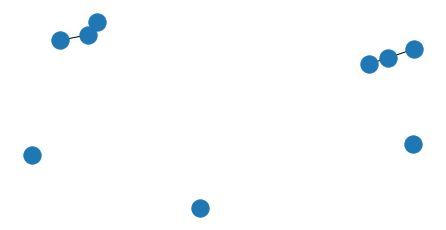

In [87]:
networkx.draw(networkx.subgraph(graph, data['nonessential_genes']))

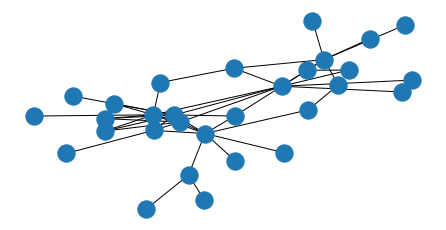

In [82]:
networkx.draw(networkx.subgraph(graph, data['essential_genes']))

In [92]:
A = networkx.subgraph(graph, data['essential_genes'])
B = networkx.subgraph(graph, data['nonessential_genes'])
U = networkx.Graph()
U.add_edges_from(list(A.edges()) + list(B.edges()))
U.add_nodes_from(list(A.nodes()) + list(B.nodes()))

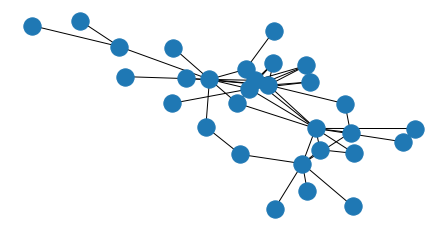

In [95]:
networkx.draw(networkx.subgraph(graph, data['essential_genes']))

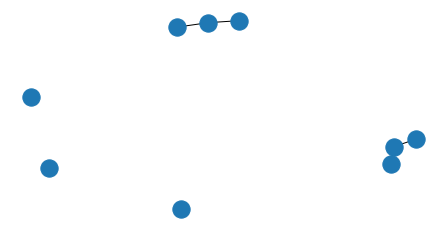

In [119]:
networkx.draw(B)

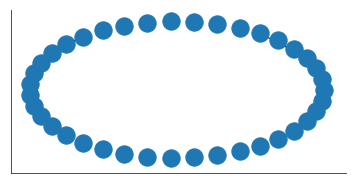

In [110]:
networkx.draw_networkx_nodes(networkx.subgraph(U, data['essential_genes']),
              pos=networkx.shell_layout(U))
networkx.draw_networkx_nodes(networkx.subgraph(U, data['nonessential_genes']),
              pos=networkx.shell_layout(U))
networkx.draw_networkx_edges(networkx.subgraph(graph, data['nonessential_genes']), 
              pos=networkx.shell_layout(graph))

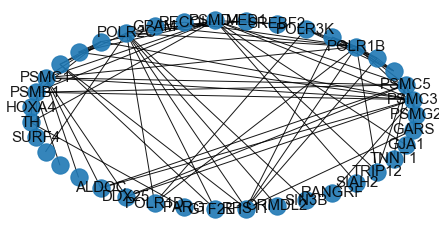

In [10]:
networkx.draw(graph,
              labels={e: e for e in data['essential_genes']},
              node_size=300,
              font_size=15, 
              alpha=.9, 
              pos=networkx.shell_layout(graph));

In [37]:
with HLM(readout) as model:
    trace = pm.load_trace(trace_dir, model = model.model)
    ppc_trace = pm.sample_posterior_predictive(trace, 10000, model.model)

Building simple hierarchical model
100%|██████████| 10000/10000 [00:13<00:00, 745.04it/s]


In [12]:
trace['gamma'].shape[1]

39

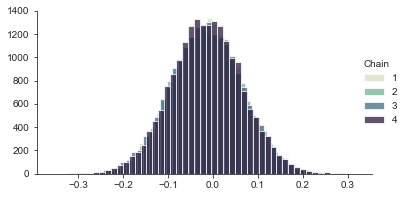

In [13]:
sp.plot_hist(trace, "gamma", 0, "");

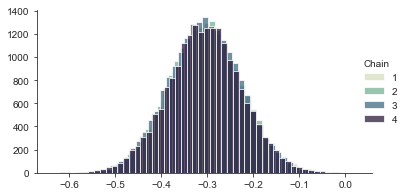

In [24]:
sp.plot_hist(trace, "gamma", 23, "");

In [14]:
data['gamma']

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -0.02493704,
        0.14621079, -0.20601407, -0.03224172, -0.03840544,  0.11337694,
       -0.10998913, -0.01724282, -0.08778584,  0.00422137,  0.05828152,
       -0.11006192,  0.11447237,  0.09015907,  0.05024943,  0.09008559,
       -0.06837279, -0.01228902, -0.09357694, -0.02678881,  0.05303555,
       -0.06916608, -0.03967535, -0.06871727, -0.08452056, -0.06712461,
       -0.00126646, -0.11173103,  0.02344157,  0.16598022])

In [15]:
data['genes']

array(['PSMC5', 'PSMB1', 'PSMC3', 'POLR3K', 'POLR2C', 'POLR1B', 'PSMC1',
       'PSMD4', 'TH', 'RPS11', 'PARG', 'ALDOC', 'RANGRF', 'GPAM', 'SURF4',
       'TRIP12', 'PSMG2', 'DDX25', 'SIN3B', 'GTF2E1', 'GJA1', 'GARS',
       'SIAH2', 'MED1', 'HOXA4', 'RECQL', 'SREBF2', 'TNNT1', 'POLR1D',
       'ORMDL2', 'CPSF3', 'NLE1', 'NCBP2', 'SUV39H1', 'ELOC', 'HIST1H2BB',
       'UBE2K', 'AATF', 'SNU13'], dtype='<U13')

In [35]:
model._beta_

{'AATF': 0,
 'ALDOC': 1,
 'CPSF3': 2,
 'DDX25': 3,
 'ELOC': 4,
 'GARS': 5,
 'GJA1': 6,
 'GPAM': 7,
 'GTF2E1': 8,
 'HIST1H2BB': 9,
 'HOXA4': 10,
 'MED1': 11,
 'NCBP2': 12,
 'NLE1': 13,
 'ORMDL2': 14,
 'PARG': 15,
 'POLR1B': 16,
 'POLR1D': 17,
 'POLR2C': 18,
 'POLR3K': 19,
 'PSMB1': 20,
 'PSMC1': 21,
 'PSMC3': 22,
 'PSMC5': 23,
 'PSMD4': 24,
 'PSMG2': 25,
 'RANGRF': 26,
 'RECQL': 27,
 'RPS11': 28,
 'SIAH2': 29,
 'SIN3B': 30,
 'SNU13': 31,
 'SREBF2': 32,
 'SURF4': 33,
 'SUV39H1': 34,
 'TH': 35,
 'TNNT1': 36,
 'TRIP12': 37,
 'UBE2K': 38}

In [36]:
numpy.mean(trace['gamma'], 0)

-0.30550529186616504

In [33]:
trace['gamma']

array([[-0.08830611, -0.06997894, -0.14813155, ..., -0.87095657,
        -0.12569308,  0.07594382],
       [ 0.16375627,  0.07981996, -0.03629061, ..., -0.68565369,
        -0.05570378, -0.09357453],
       [ 0.10535177,  0.03659262,  0.01082694, ..., -0.67617915,
        -0.05266268, -0.00948426],
       ...,
       [ 0.08901883,  0.00601703, -0.13360638, ..., -0.67787125,
        -0.04918077, -0.01731404],
       [ 0.06026684, -0.0235015 , -0.14220929, ..., -0.67489238,
        -0.06012318, -0.02333   ],
       [-0.00995807,  0.01217319, -0.08179433, ..., -0.67641947,
        -0.06192514, -0.06414005]])

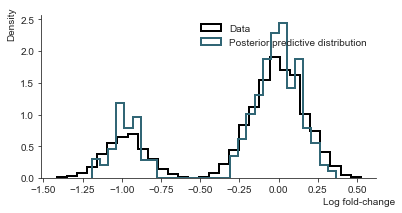

In [39]:
sp.plot_steps(readout, ppc_trace, bins=30);

## Small clustering model

In [45]:
trace_dir = "../results/clustering_model_trace"
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

In [46]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

In [47]:
with HLM(readout, model="clustering") as model:
    trace = pm.load_trace(trace_dir, model = model.model)
    ppc_trace = pm.sample_posterior_predictive(trace, 10000, model.model)

Building cluster hierarchical model
100%|██████████| 10000/10000 [00:12<00:00, 776.60it/s]


In [54]:
model._beta_index_to_gene

{0: 'AATF',
 1: 'ALDOC',
 2: 'CPSF3',
 3: 'DDX25',
 4: 'ELOC',
 5: 'GARS',
 6: 'GJA1',
 7: 'GPAM',
 8: 'GTF2E1',
 9: 'HIST1H2BB',
 10: 'HOXA4',
 11: 'MED1',
 12: 'NCBP2',
 13: 'NLE1',
 14: 'ORMDL2',
 15: 'PARG',
 16: 'POLR1B',
 17: 'POLR1D',
 18: 'POLR2C',
 19: 'POLR3K',
 20: 'PSMB1',
 21: 'PSMC1',
 22: 'PSMC3',
 23: 'PSMC5',
 24: 'PSMD4',
 25: 'PSMG2',
 26: 'RANGRF',
 27: 'RECQL',
 28: 'RPS11',
 29: 'SIAH2',
 30: 'SIN3B',
 31: 'SNU13',
 32: 'SREBF2',
 33: 'SURF4',
 34: 'SUV39H1',
 35: 'TH',
 36: 'TNNT1',
 37: 'TRIP12',
 38: 'UBE2K'}

In [53]:
model._beta_idx

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30,
       30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37,
       37, 37, 37, 38, 38, 38, 38, 38])

In [59]:
data['genes']

array(['PSMC5', 'PSMB1', 'PSMC3', 'POLR3K', 'POLR2C', 'POLR1B', 'PSMC1',
       'PSMD4', 'TH', 'RPS11', 'PARG', 'ALDOC', 'RANGRF', 'GPAM', 'SURF4',
       'TRIP12', 'PSMG2', 'DDX25', 'SIN3B', 'GTF2E1', 'GJA1', 'GARS',
       'SIAH2', 'MED1', 'HOXA4', 'RECQL', 'SREBF2', 'TNNT1', 'POLR1D',
       'ORMDL2', 'CPSF3', 'NLE1', 'NCBP2', 'SUV39H1', 'ELOC', 'HIST1H2BB',
       'UBE2K', 'AATF', 'SNU13'], dtype='<U13')

In [62]:
data['beta']

array([-0.92579558, -1.01918356, -1.0887629 , -1.07471583, -0.83075454,
       -0.99491922, -1.06369956, -0.98090845, -0.78997449, -0.9879841 ,
       -0.93827969, -0.96998297, -1.03522498, -1.11425182, -1.03493427,
       -1.02088942, -0.94133768, -0.91610166, -0.90688979, -0.97144127,
       -0.91148588, -1.07543979, -0.87471318, -0.94870702, -1.02980928,
       -0.95114819, -1.00755717, -0.88683706, -0.84801832, -0.78144246,
       -1.13964963, -1.14441138, -1.05044659, -0.98399629, -0.91238311,
       -0.96843651, -1.20222012, -1.0306204 , -0.91720254, -0.97699053,
       -0.92379888, -1.02223281, -1.02007581, -0.98134386, -0.95899484,
       -0.00510707, -0.01303617, -0.09200327,  0.01281934, -0.01275491,
        0.25915918,  0.26610258,  0.16472644,  0.1086823 ,  0.08233775,
       -0.16366464, -0.19828006, -0.24039944, -0.20165439, -0.26801416,
        0.03756148, -0.07695458,  0.09020905,  0.00810744,  0.02711613,
       -0.14789662, -0.02146719,  0.03565021, -0.1337755 , -0.06

In [61]:
np.mean(trace['beta'], 0)p

array([-0.02584545,  0.08371106, -0.07251876,  0.10728354, -0.11916817,
       -0.00611792,  0.13236716,  0.10568223,  0.05325046, -0.08817971,
       -0.20588414, -0.21367956,  0.02942385, -0.09114796,  0.09265041,
        0.1542642 , -0.12156158,  0.00161107, -0.03790692,  0.04643079,
        0.0371509 , -0.06605365, -0.07827586,  0.12207835,  0.18669817,
       -0.82850036, -0.98204825, -0.91362438, -0.96090278, -1.01311106,
       -1.08633815, -0.8113393 , -1.01071891, -1.06280564, -0.963317  ,
        0.00423598,  0.02281642,  0.02023501,  0.01432144, -0.1312736 ,
        0.16873759,  0.18409864,  0.16086935,  0.2444505 ,  0.35003049,
       -0.27758639,  0.00396748,  0.05278532, -0.03151189, -0.21829841,
       -0.90186988, -1.02372785, -0.89282804, -0.83237528, -0.80008579,
       -0.99638578, -0.90681745, -1.05176996, -0.86528357, -0.97355456,
       -0.08497855,  0.1248529 , -0.0166607 ,  0.12496303,  0.22333341,
        0.01777312,  0.04274072, -0.1591408 , -0.06031843,  0.04

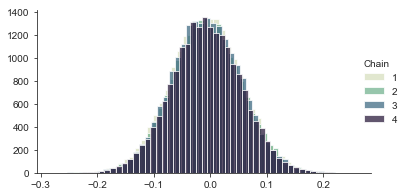

In [49]:
sp.plot_hist(trace, "gamma", 0, "");

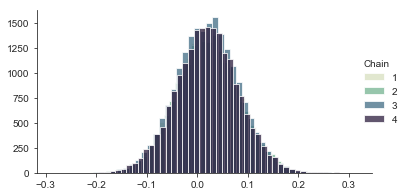

In [50]:
sp.plot_hist(trace, "gamma", 1, "");

In [21]:
data['gamma']

array([-1.        , -0.06117564])

In [22]:
numpy.mean(trace['gamma'], 0)

array([-0.0859469 , -1.00773446])

In [23]:
numpy.mean(trace['z'], 0)

array([0.2143 , 0.80805])

In [24]:
data['beta']

array([-1.05281718, -1.10729686, -0.91345924, -1.23015387, -0.82551882,
       -0.13729633, -0.02927173, -0.08611268,  0.08503515, -0.26718971])

In [25]:
numpy.mean(trace['beta'], 0)[list(model._beta_idx_to_gene_cond.keys())]

array([-1.0408246 , -1.09808761, -0.91027078, -1.21874148, -0.80704292,
       -0.12683693, -0.00913454, -0.10237898,  0.10006538, -0.26083932])

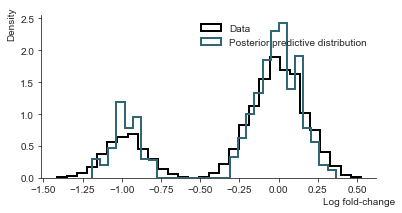

In [63]:
sp.plot_steps(readout, ppc_trace, bins=30);

## MRF model

In [35]:
readout_file = "../data_raw/simulated_data.tsv"
graph_file = "../data_raw/graph.pickle"
data_file = "../data_raw/data.pickle"
trace_dir = "../results/mrf_model_trace"

In [36]:
with open(graph_file, "rb") as fh:
    G = pickle.load(fh)    

In [40]:
with open(data_file, "rb") as fh:
    data = pickle.load(fh)    

In [42]:
readout = pd.read_csv(readout_file, sep="\t")

In [46]:
with HLM(readout, model="mrf", graph=G) as model:
    trace = pm.load_trace(trace_dir, model = model.model)
    ppc_trace = pm.sample_posterior_predictive(trace, 10000, model.model)

Building mrf hierarchical model
100%|██████████| 10000/10000 [00:07<00:00, 1408.25it/s]


In [53]:
model._index_to_gene

{15: 'PSMC5',
 12: 'PSMB1',
 14: 'PSMC3',
 11: 'POLR3K',
 10: 'POLR2C',
 9: 'POLR1B',
 13: 'PSMC1',
 16: 'PSMD4',
 18: 'TH',
 5: 'FEZF2',
 0: 'ACSM3',
 6: 'FMO3',
 3: 'CDC123',
 2: 'C2CD2L',
 19: 'ULBP1',
 4: 'ETV2',
 1: 'ARHGAP44',
 7: 'KRT23',
 17: 'SATB2',
 8: 'PHOX2B'}

In [28]:
data['gamma']

array([-0.83756546, -0.06117564])

In [29]:
numpy.mean(trace['gamma'], 0)

array([-0.02990114, -0.01725048,  0.01063074, -1.22287571, -0.96609743,
       -1.11382428, -1.07427945, -0.75047874, -1.1172765 , -0.83616208,
       -1.07950759, -1.02907056])

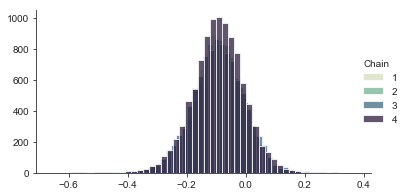

In [31]:
sp.plot_hist(trace, "gamma", 0, "");

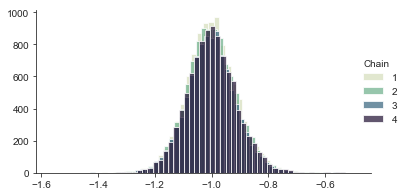

In [32]:
sp.plot_hist(trace, "gamma", 1, "");

In [76]:
numpy.mean(trace['z'], 0)[5]

1.0

In [34]:
data['beta']

array([-1.05281718, -1.10729686, -0.91345924, -1.23015387, -0.82551882,
       -0.13729633, -0.02927173, -0.08611268,  0.08503515, -0.26718971])

In [78]:
model._beta_idx_to_gene_cond

{115: 'PSMC5-C0',
 116: 'PSMC5-C1',
 117: 'PSMC5-C2',
 118: 'PSMC5-C3',
 119: 'PSMC5-C4',
 100: 'PSMB1-C0',
 101: 'PSMB1-C1',
 102: 'PSMB1-C2',
 103: 'PSMB1-C3',
 104: 'PSMB1-C4',
 110: 'PSMC3-C0',
 111: 'PSMC3-C1',
 112: 'PSMC3-C2',
 113: 'PSMC3-C3',
 114: 'PSMC3-C4',
 95: 'POLR3K-C0',
 96: 'POLR3K-C1',
 97: 'POLR3K-C2',
 98: 'POLR3K-C3',
 99: 'POLR3K-C4',
 90: 'POLR2C-C0',
 91: 'POLR2C-C1',
 92: 'POLR2C-C2',
 93: 'POLR2C-C3',
 94: 'POLR2C-C4',
 80: 'POLR1B-C0',
 81: 'POLR1B-C1',
 82: 'POLR1B-C2',
 83: 'POLR1B-C3',
 84: 'POLR1B-C4',
 105: 'PSMC1-C0',
 106: 'PSMC1-C1',
 107: 'PSMC1-C2',
 108: 'PSMC1-C3',
 109: 'PSMC1-C4',
 120: 'PSMD4-C0',
 121: 'PSMD4-C1',
 122: 'PSMD4-C2',
 123: 'PSMD4-C3',
 124: 'PSMD4-C4',
 175: 'TH-C0',
 176: 'TH-C1',
 177: 'TH-C2',
 178: 'TH-C3',
 179: 'TH-C4',
 140: 'RPS11-C0',
 141: 'RPS11-C1',
 142: 'RPS11-C2',
 143: 'RPS11-C3',
 144: 'RPS11-C4',
 75: 'PARG-C0',
 76: 'PARG-C1',
 77: 'PARG-C2',
 78: 'PARG-C3',
 79: 'PARG-C4',
 5: 'ALDOC-C0',
 6: 'ALDOC-C1',
 7:

In [35]:
numpy.mean(trace['beta'], 0)[list(model._beta_idx_to_gene_cond.keys())]

array([-1.04078555, -1.09796133, -0.90957523, -1.21867064, -0.80656429,
       -0.1271084 , -0.00953171, -0.10283612,  0.10056849, -0.26158091])

In [36]:
P1 = numpy.mean(trace['z'], 0)
P0 = 1 - P1

prob_table = pd.DataFrame(
    {"p": np.concatenate((P0, P1)), 
     "k": ["No-hit", "No-hit", "Hit", "Hit"],
     "g": ["G0", "G1", "G0", "G1"]
    })

In [37]:
cols = sns.color_palette("RdBu", n_colors=7)
cols = ["#E84646", "#316675"]

In [77]:
ax = sns.barplot(x="g", y="p", hue="k", data=prob_table, palette=cols,
                 linewidth=2.5, edgecolor=".2");
sns.despine();
plt.title('Posterior class label', loc = 'left', fontsize = 16)
ax.legend(loc='center right', fancybox=False, framealpha=0, shadow=False, borderpad=1,
          bbox_to_anchor=(1.5, 0.5), ncol=1);

NameError: name 'prob_table' is not defined

In [56]:
trace['z'].shape

(400, 20)

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


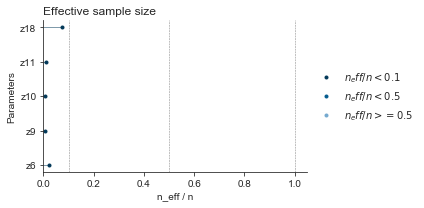

In [54]:
sp.plot_neff(trace, "z");

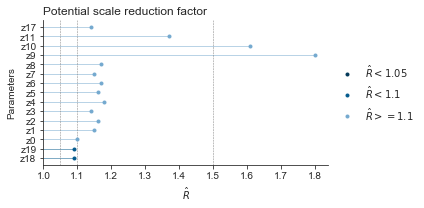

In [57]:
sp.plot_rhat(trace, "z");

In [41]:
with model.model:
    ppc_trace = pm.sample_posterior_predictive(trace, 25000, random_seed=1)

100%|██████████| 25000/25000 [00:15<00:00, 1638.62it/s]


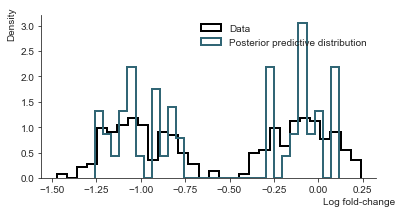

In [42]:
sp.plot_steps(readout, ppc_trace, bins=30);